# Basic NN model

In [44]:
#imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import *
from sklearn import preprocessing

In [47]:
#load data
trainset = pd.read_csv('archive/sign_mnist_train.csv')
train_y = trainset['label']
trainset.drop('label', inplace=True, axis=1)
trainset = trainset.values.reshape(-1, 28,28, 1)

testset = pd.read_csv('archive/sign_mnist_test.csv')
test_y = testset['label']
testset.drop('label', inplace=True, axis=1)
testset = testset.values.reshape(-1, 28, 28, 1)

#encode labels
le = preprocessing.LabelEncoder()
le.fit(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 
        "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", 
        "U", "V", "W", "X", "Y", "Z"])

trainlabel = le.inverse_transform(train_y)
testlabel = le.inverse_transform(test_y)

Text(0.5, 1.0, 'L')

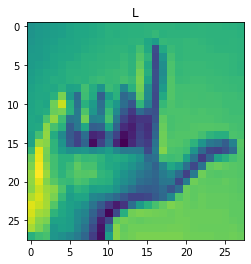

In [49]:
#visualize the datasets
i = 73
plt.imshow(trainset[i][:,:,0])
plt.title(trainlabel[i])

In [76]:
#construct basic model
model=Sequential([])

#layer1
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#layer 2
#model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(26,activation="softmax"))

In [77]:
#compile and train
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(trainset, train_y, epochs=1, batch_size= 32)

Epoch 1/1
27455/27455 [==============================] - 65s 2ms/step - loss: 0.2196 - accuracy: 0.9556


In [78]:
model.evaluate(testset, test_y, batch_size = 32)

7172/7172 [==============================] - 4s 540us/step


[1.5948785794435285, 0.7356386184692383]

In [79]:
classes = model.predict(testset)

In [86]:
predictions = np.argmax(classes, axis=1)
predictlabels = le.inverse_transform(predictions)

Text(0.5, 1.0, 'D   (D)')

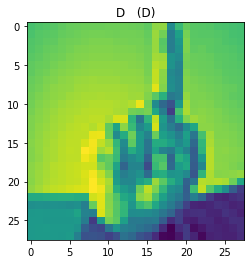

In [92]:
#visualize the datasets
i = 4
plt.imshow(testset[i][:,:,0])
plt.title(predictlabels[i]+'   ('+testlabel[i]+')')